In [2]:
# pip install qiskit

In [ ]:
pip install qiskit==0.45.0

In [ ]:
pip install qiskit-aer

In [ ]:
pip install qiskit-ibmq-provider

In [ ]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [ ]:
pip install pylatexenc

In [ ]:
pip install qiskit-finance

In [9]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import *
from qiskit_aer import Aer
# from qiskit_ibmq_provider import IBMQ
# from qiskit.providers.ibmq import least_busy
# from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [10]:
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation:
        circuit.cp(pi/2**(n-qubit), qubit, n)
    #qft_rotations(circuit, n)


In [11]:
from qiskit_textbook.widgets import scalable_circuit
scalable_circuit(qft_rotations)

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xc1\x00\x00\x01o\x08\x06\x00\x00\x00\xabO\x16w\x…

In [12]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw()

┌───┐
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├
           │                               │                ┌───┐ │P(π/2) └───┘
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■────────────
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘              
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■──────────────────────────
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────
     └───┘

In [13]:
scalable_circuit(qft_rotations)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xb2\x00\x00\x01o\x08\x06\x00\x00\x00\x9f\n=o\x00…

In [14]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw()

┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                               │                ┌───┐ │P(π/2) └───┘»
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X──»
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘           │  »
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■───────────────────────X──»
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) └───┘                                     »
q_3: ┤ H ├─■────────■────────■─────────────────────────────────────────────────»
     └───┘                                                                     »
«        
«q_0: ─X─
«      │ 
«q_1: ─┼─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─X─
«

In [15]:
scalable_circuit(qft)

IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\x05\x00\x00\x01o\x08\x06\x00\x00\x00j\xc2\xcb.\x…

computational basis


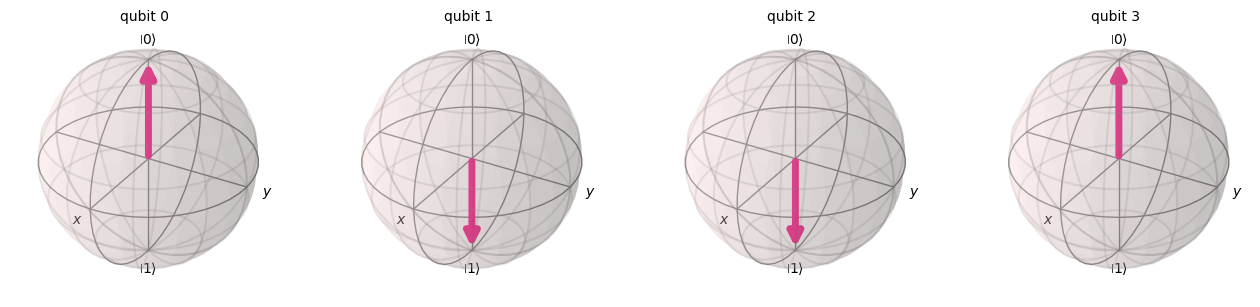

In [16]:
qc=QuantumCircuit(4)

qc.x(1)
qc.x(2)

print("computational basis")
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()

plot_bloch_multivector(statevector)

fourier basis
Statevector([ 2.50000000e-01-6.12323400e-17j,
             -1.76776695e-01+1.76776695e-01j,
             -7.65404249e-17-2.50000000e-01j,
              1.76776695e-01+1.76776695e-01j,
             -2.50000000e-01+6.12323400e-17j,
              1.76776695e-01-1.76776695e-01j,
              7.65404249e-17+2.50000000e-01j,
             -1.76776695e-01-1.76776695e-01j,
              2.50000000e-01-6.12323400e-17j,
             -1.76776695e-01+1.76776695e-01j,
             -7.65404249e-17-2.50000000e-01j,
              1.76776695e-01+1.76776695e-01j,
             -2.50000000e-01+6.12323400e-17j,
              1.76776695e-01-1.76776695e-01j,
              7.65404249e-17+2.50000000e-01j,
             -1.76776695e-01-1.76776695e-01j],
            dims=(2, 2, 2, 2))


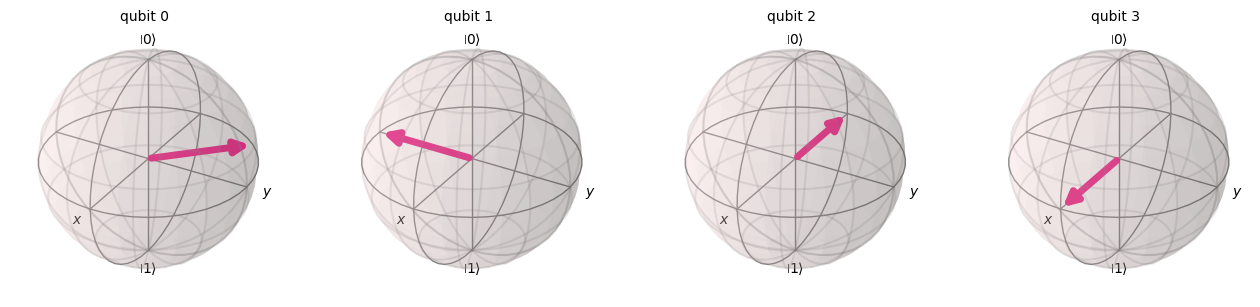

In [17]:
print("fourier basis")
qft(qc,4)
qc.draw()
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

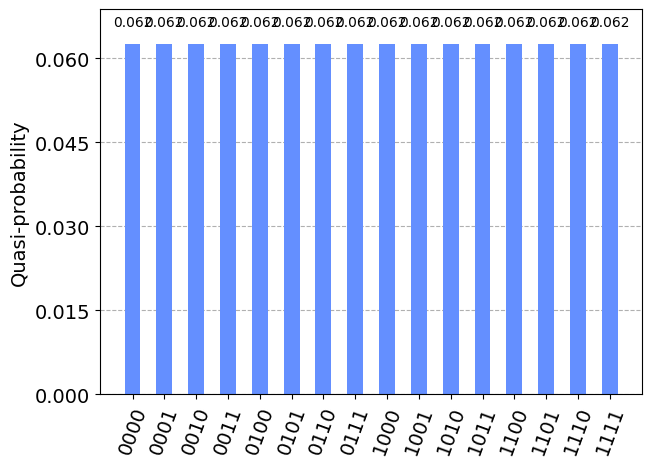

In [18]:
#probability distribution of QFT|000>

backend = Aer.get_backend("qasm_simulator")
simulate = execute(qc, backend=backend, shots=1024).result()
simulate.get_counts()
plot_histogram(simulate.get_counts())

In [19]:
from qiskit_finance.circuit.library.probability_distributions import NormalDistribution
n=3

qc = NormalDistribution(n,bounds=(-6, 6))# input normal distribution (in the 01 basis)
qc_init = qc.copy()
qc_init.save_statevector()
#x1 = qc.values
#y1 = qc.probabilities

#plt.bar(x1, y1, width=0.02)
#plt.show()
print("###########################")
qft(qc,n)


qftnormal=qc.copy()
qc.save_statevector()
qc.draw()
backend = Aer.get_backend("qasm_simulator")
simulate = execute(qc, backend=backend, shots=1024).result()
simulate.get_counts()
x=np.array(simulate.get_statevector())# coefficients
print(x)

P=[]
for i in range(len(x)):
  P.append(np.abs(x[i])**2) # probability

print(P)






###########################
[ 6.05338439e-01-1.11198867e-16j -4.53354852e-01+1.87785728e-01j
  1.84639255e-01-1.84639255e-01j -3.38091156e-02+8.16224253e-02j
 -9.99200722e-16+3.63485141e-17j -3.38091156e-02-8.16224253e-02j
  1.84639255e-01+1.84639255e-01j -4.53354852e-01-1.87785728e-01j]
[0.3664346262282017, 0.24079410166130563, 0.06818330861399788, 0.007805276610595573, 9.997232976470353e-31, 0.007805276610595597, 0.06818330861399788, 0.24079410166130563]


[0. 1. 2. 3. 4. 5. 6. 7.]


<BarContainer object of 8 artists>

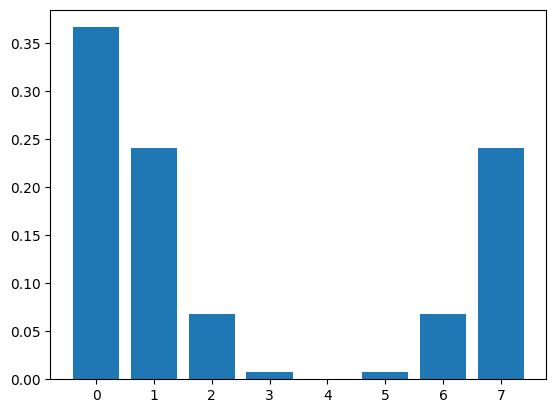

In [20]:
s=np.linspace(0,(2**n)-1,2**n)
print(s)
import matplotlib.pyplot as plt
plt.bar(s,P)


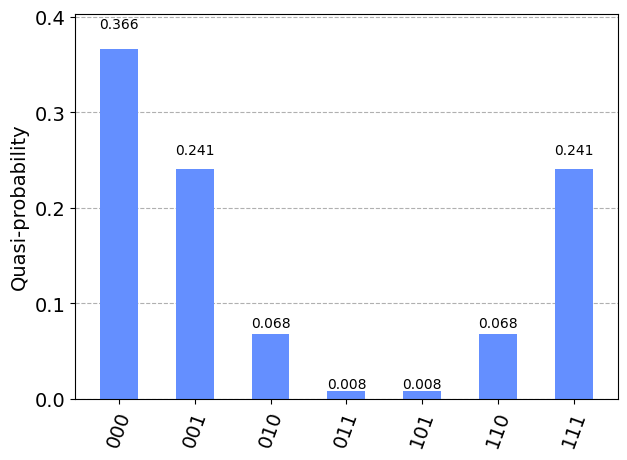

In [21]:
plot_histogram(simulate.get_counts())# (output in the 01 basis) need to check whether its a guassian in +- basis

# Inverse QFT

In [22]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

In [23]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤ P(5π/4) ├
     ├───┤├─────────┤
q_1: ┤ H ├┤ P(5π/2) ├
     ├───┤└┬───────┬┘
q_2: ┤ H ├─┤ P(5π) ├─
     └───┘ └───────┘

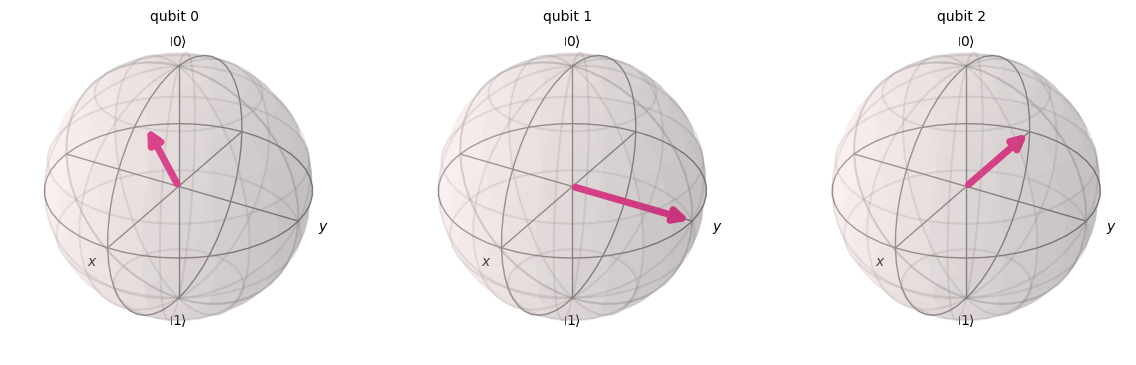

In [24]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

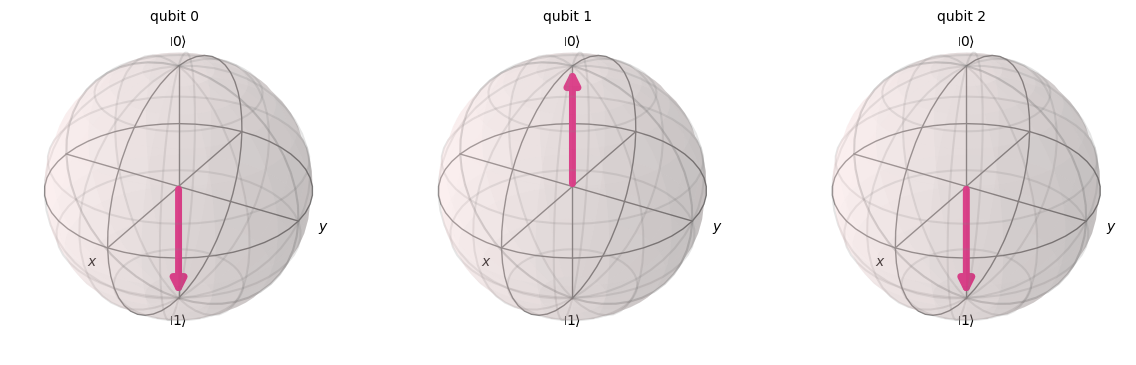

In [25]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

Text(0.5, 1.0, 'input')

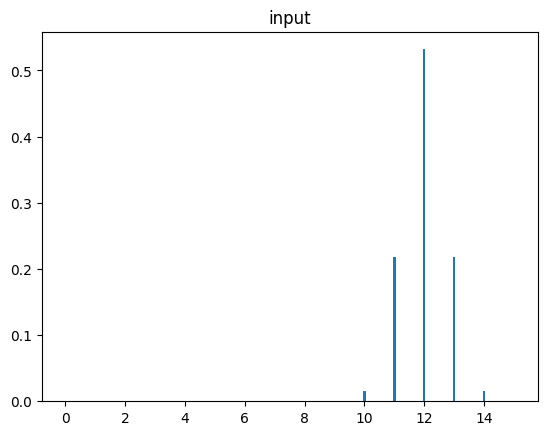

In [26]:
from qiskit_finance.circuit.library.probability_distributions import NormalDistribution
n=4
import matplotlib.pyplot as plt
from scipy.fft import fftfreq
qc = NormalDistribution(n,mu=6,bounds=(-10, 10))

t=np.linspace(0,2**n-1,2**n)
plt.bar(t,qc.probabilities,width=0.08)
plt.title("input")

#qc_init = qc.copy()
#qc_init.save_statevector()
#plt.bar(qc.values,qc.probabilities)
#x1 = qc.values
#y1 = qc.probabilities

#plt.bar(x1, y1, width=0.02)
#plt.show()



###########################


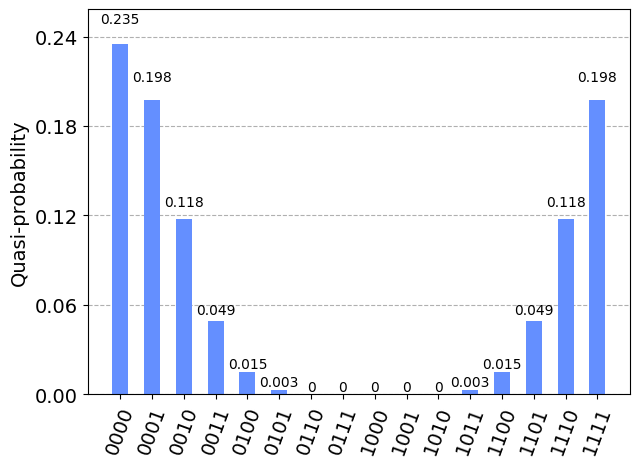

In [27]:
print("###########################")

qft(qc,n)
qftnormal=qc.copy()
qc.save_statevector()
backend = Aer.get_backend("qasm_simulator")
simulate = execute(qc, backend=backend, shots=1024).result()
simulate.get_counts()
plot_histogram(simulate.get_counts())

#x2 = qc.values
#y2 = qc.probabilities

#plt.bar(x2, y2, width=0.02)
#plt.show()

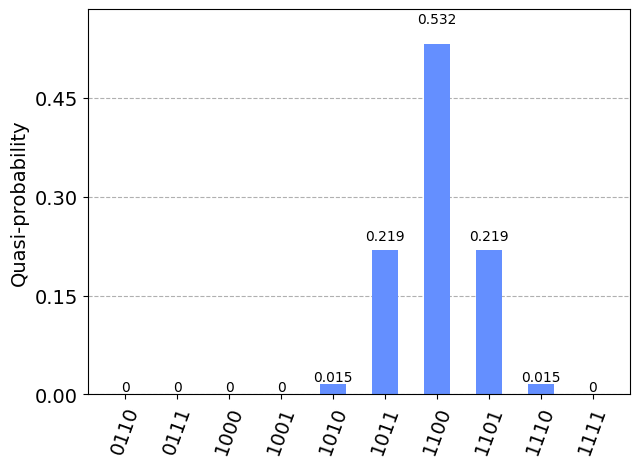

In [28]:

qp=qftnormal # input of inv_qft as the qft of normal distribution
inverse_qft(qp,n)
qp.save_statevector()

backend = Aer.get_backend("qasm_simulator")
simulate = execute(qp, backend=backend, shots=1024).result()
simulate.get_counts()
plot_histogram(simulate.get_counts())# gets back normal distribution as the out put.